In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from mpl_toolkits.mplot3d import Axes3D
from stl import mesh
from mpl_toolkits import mplot3d
import scipy.stats as stats

#import ParticlePlottingFunctions
import ParticlePlottingFunctions as ppf
%load_ext autoreload
%autoreload 2

In [2]:
# file1 = "100UCN_Fill_noSnapFilter.root"
file1 = "500UCN_Fill_minus1_moreTimes.root"

#get our two different data folders already for ease
Nend = up.open(file1+":neutronend")
Nsnapshot = up.open(file1+":neutronsnapshot")

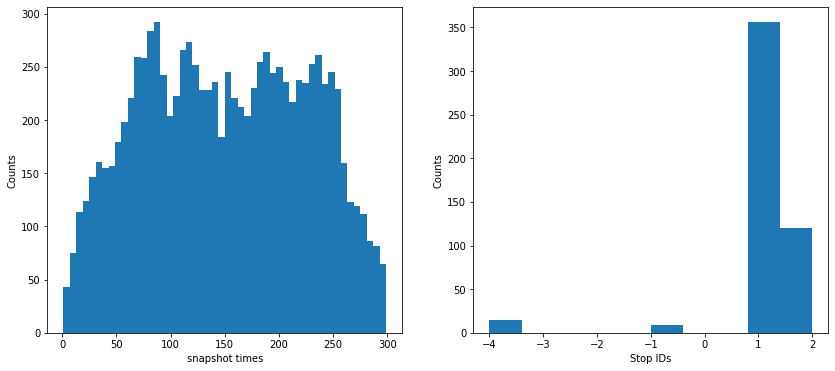

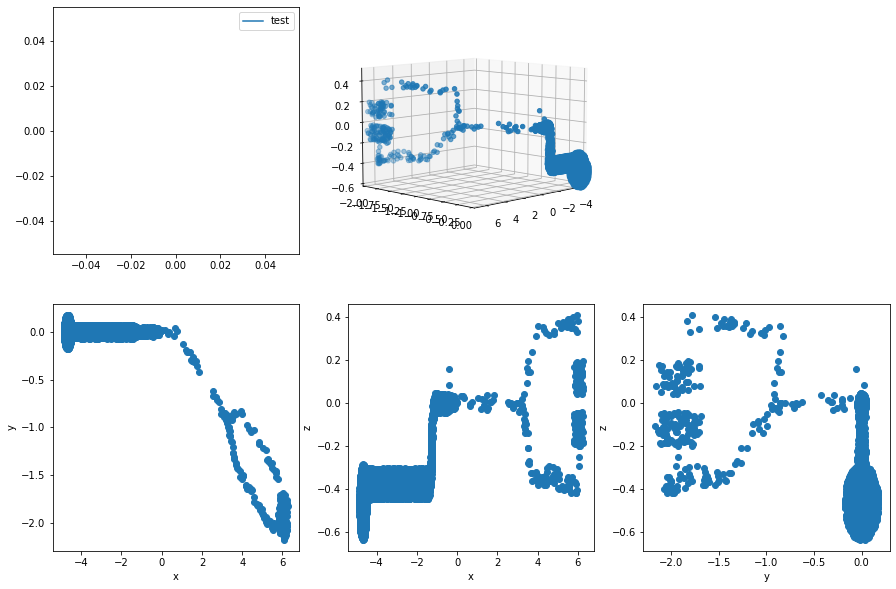

In [6]:
%matplotlib inline
#keeps the graphs non-interactive
#quick initial look at the simulation data

fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].hist(Nsnapshot['tend'].array(), bins=50)
axs[0].set_xlabel('snapshot times')
axs[0].set_ylabel('Counts')
axs[1].hist(Nend['stopID'].array())
axs[1].set_xlabel('Stop IDs')
axs[1].set_ylabel('Counts')
plt.show()

x = Nsnapshot['xend'].array()
y = Nsnapshot['yend'].array()
z = Nsnapshot['zend'].array()

ppf.pltShape(x, y, z, label="test")

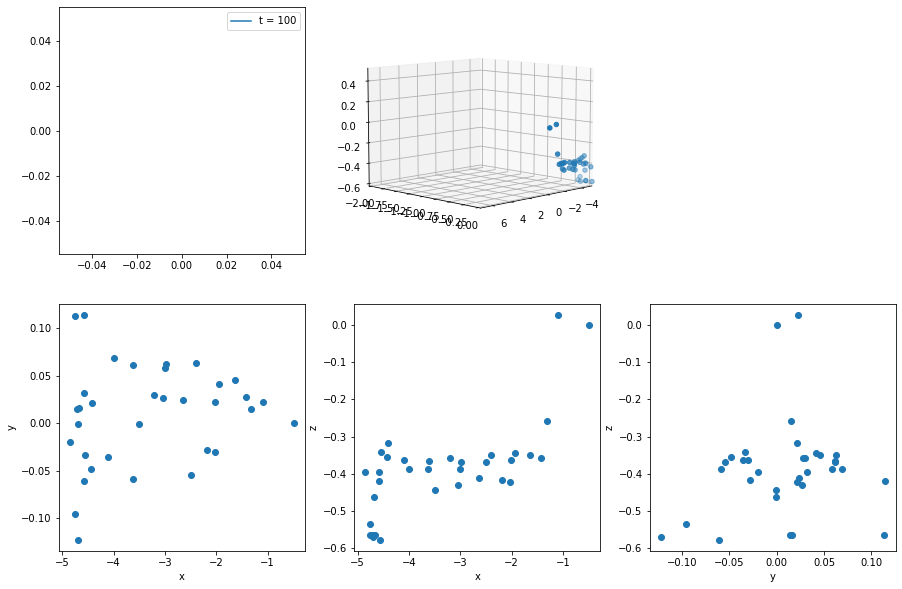

In [7]:
%matplotlib inline
endSpots = Nsnapshot.arrays(["xend", "yend", "zend"], "tend == 100")

x = endSpots['xend']
y = endSpots['yend']
z = endSpots['zend']

ppf.pltShape(x, y, z, startPlot=True, endPlot=True, label="t = 100")

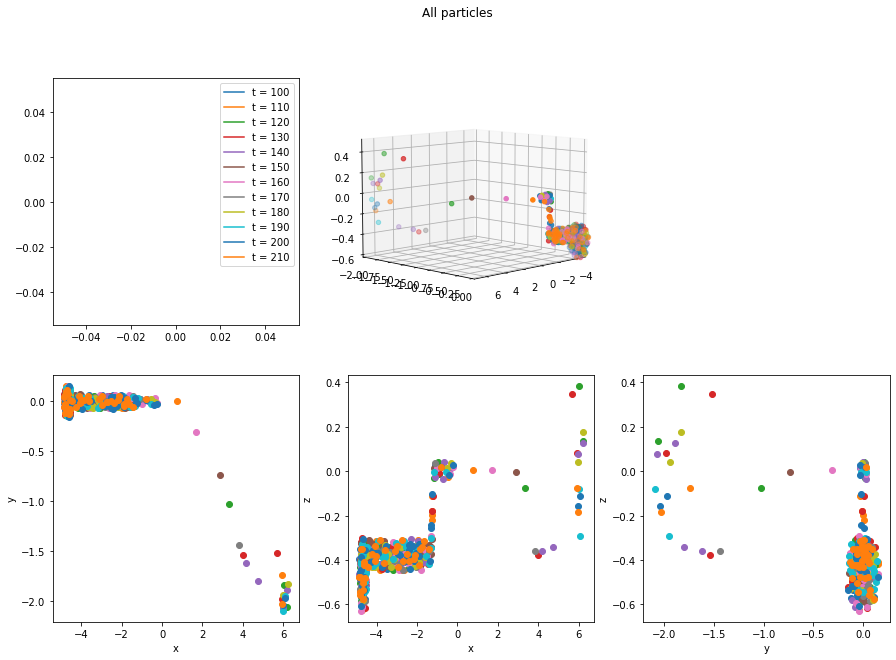

In [8]:
%matplotlib inline
endSpots = Nsnapshot.arrays(["xend", "yend", "zend"], "tend == 100")
# endSpots = endSpots_cut

x = endSpots['xend']
y = endSpots['yend']
z = endSpots['zend']

figVals = ppf.pltShape(x, y, z, startPlot=True, endPlot=False, label="t = 100")

fig, ax0, ax1, ax2, ax3, ax4 = figVals
fig.suptitle("All particles")

tarr = np.arange(110, 210, 10)
for t in tarr:
    endSpots = Nsnapshot.arrays(["xend", "yend", "zend"], "tend == {}".format(t))
    
    x = endSpots['xend']
    y = endSpots['yend']
    z = endSpots['zend']

    ppf.pltShape(x, y, z, startPlot=False, endPlot=False, label="t = {}".format(t), figVals=figVals)
    
t = 210
endSpots = Nsnapshot.arrays(["xend", "yend", "zend"], "tend == {}".format(t))

x = endSpots['xend']
y = endSpots['yend']
z = endSpots['zend']

ppf.pltShape(x, y, z, startPlot=False, endPlot=True, label="t = {}".format(t), figVals=figVals)

Remaining particles: {5.0, 6.0, 8.0, 11.0, 16.0, 19.0, 22.0, 23.0, 25.0, 27.0, 32.0, 33.0, 37.0, 38.0, 42.0, 45.0, 46.0, 47.0, 52.0, 53.0, 56.0, 61.0, 66.0, 75.0, 82.0, 84.0, 85.0, 89.0, 92.0, 97.0, 102.0, 106.0, 108.0, 115.0, 120.0, 126.0, 128.0, 135.0, 136.0, 140.0, 142.0, 154.0, 155.0, 161.0, 166.0, 168.0, 170.0, 173.0, 178.0, 186.0, 187.0, 196.0, 201.0, 202.0, 203.0, 207.0, 209.0, 213.0, 220.0, 229.0, 230.0, 233.0, 234.0, 235.0, 241.0, 243.0, 255.0, 260.0, 272.0, 274.0, 276.0, 278.0, 279.0, 282.0, 304.0, 305.0, 312.0, 315.0, 317.0, 324.0, 327.0, 328.0, 330.0, 336.0, 337.0, 338.0, 346.0, 348.0, 360.0, 361.0, 372.0, 373.0, 378.0, 379.0, 383.0, 389.0, 395.0, 401.0, 405.0, 406.0, 414.0, 417.0, 419.0, 420.0, 422.0, 436.0, 445.0, 447.0, 450.0, 455.0, 459.0, 466.0, 476.0, 483.0, 488.0, 490.0, 498.0}
Number of counts in the Y guide: 0


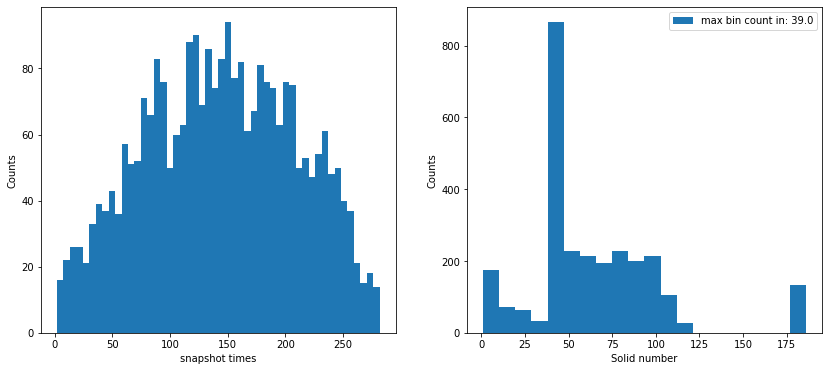

In [23]:
#find a particle that makes it through

# stopID
n=2
#get only the particle numbers that have this stopID
endIDs_cut = Nend.arrays(["particle"], "stopID == {}".format(n))

# len(endIDs_cut) #the number of particles that satisfy

#now take the whole snapshot log
endSpots_all = Nsnapshot.arrays(["particle", "xend", "yend", "zend", "tend", "solidend"])

#and get a mask that is only true for the particle numbers that are in endIDs_cut
boolean_mask = np.isin(endSpots_all["particle"], endIDs_cut["particle"])

#use this mask to cut out all but the full snapshots of the particles we want
endSpots_cut = endSpots_all[boolean_mask]

# The particle numbers that made it all the way through
print("Remaining particles:", set(endSpots_cut["particle"]))
print("Number of counts in the Y guide: {}".format(len(endSpots_cut[endSpots_cut['solidend']==183])))

fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].hist(endSpots_cut['tend'], bins=50)
axs[0].set_xlabel('snapshot times')
axs[0].set_ylabel('Counts')
axs[1].hist(endSpots_cut['solidend'], bins=20, label="max bin count in: {}".format(stats.mode(endSpots_cut['solidend'])[0][0]))
axs[1].set_xlabel('Solid number')
axs[1].set_ylabel('Counts')
axs[1].legend()
plt.show()

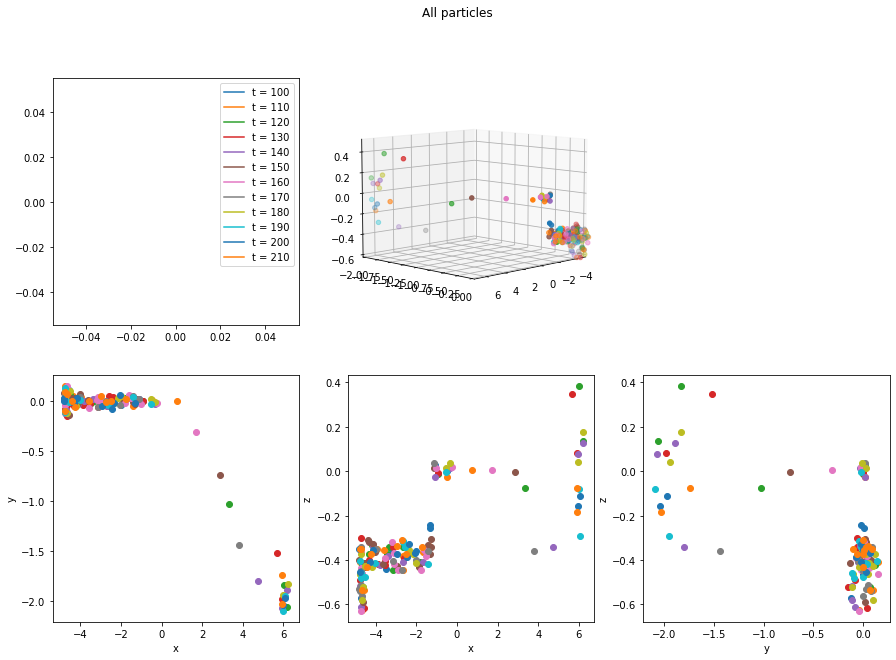

In [22]:
%matplotlib inline
endSpots = endSpots_cut[endSpots_cut["tend"] == 100]

x = endSpots['xend']
y = endSpots['yend']
z = endSpots['zend']

figVals = ppf.pltShape(x, y, z, startPlot=True, endPlot=False, label="t = 100")

fig, ax0, ax1, ax2, ax3, ax4 = figVals
fig.suptitle("All particles")

tarr = np.arange(110, 210, 10)
for t in tarr:
    endSpots = endSpots_cut[endSpots_cut["tend"] == t]
    
    x = endSpots['xend']
    y = endSpots['yend']
    z = endSpots['zend']

    ppf.pltShape(x, y, z, startPlot=False, endPlot=False, label="t = {}".format(t), figVals=figVals)
    
t = 210
endSpots = endSpots_cut[endSpots_cut["tend"] == t]

x = endSpots['xend']
y = endSpots['yend']
z = endSpots['zend']

ppf.pltShape(x, y, z, startPlot=False, endPlot=True, label="t = {}".format(t), figVals=figVals)

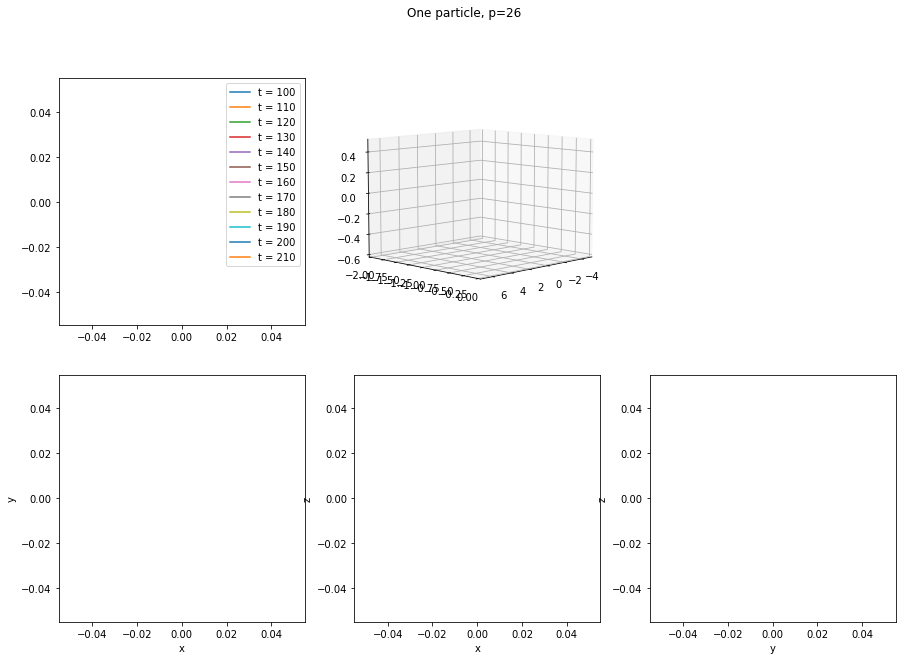

In [26]:
%matplotlib inline
t = 100
p = 26 #look at just one particle at different times
endSpots = Nsnapshot.arrays(["xend", "yend", "zend"], "(tend == {}) & (particle=={})".format(t, p))

x = endSpots['xend']
y = endSpots['yend']
z = endSpots['zend']

figVals = ppf.pltShape(x, y, z, startPlot=True, endPlot=False, label="t = 100")
fig, ax0, ax1, ax2, ax3, ax4 = figVals
fig.suptitle("One particle, p={}".format(p))

tarr = np.arange(110, 210, 10)
for t in tarr:
    endSpots = Nsnapshot.arrays(["xend", "yend", "zend"], "(tend == {}) & (particle=={})".format(t, p))

    x = endSpots['xend']
    y = endSpots['yend']
    z = endSpots['zend']

    ppf.pltShape(x, y, z, startPlot=False, endPlot=False, label="t = {}".format(t), figVals=figVals)
    
t = 210
endSpots = Nsnapshot.arrays(["xend", "yend", "zend"], "(tend == {}) & (particle=={})".format(t, p))

x = endSpots['xend']
y = endSpots['yend']
z = endSpots['zend']

ppf.pltShape(x, y, z, startPlot=False, endPlot=True, label="t = {}".format(t), figVals=figVals)

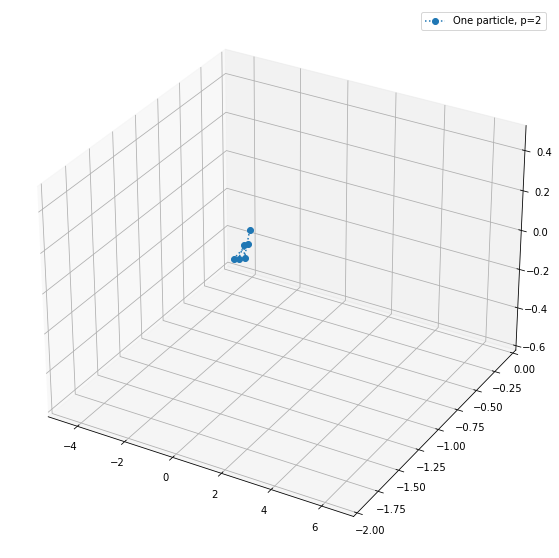

In [29]:
%matplotlib inline 
#lets you move the graph around within jupyter lab

#look at just one particle at different times
t = 100
p = 200
endSpots = Nsnapshot.arrays(["tend", "xend", "yend", "zend"], "(tend%10==0) & (particle=={})".format(p), library="np")

x = endSpots['xend'].astype(float)
y = endSpots['yend'].astype(float)
z = endSpots['zend'].astype(float)
   
ppf.plot3D(x, y, z, label="One particle, p=2", ls=':')# startPlot=False, endPlot=True)
# fig.suptitle("One particle, p=2")


# Geometry Work

In [13]:
#the output file from running the nEDMsensitivity sim with option #7 for geometry
geo = np.loadtxt('geometry.out', skiprows=1, max_rows=100000).T

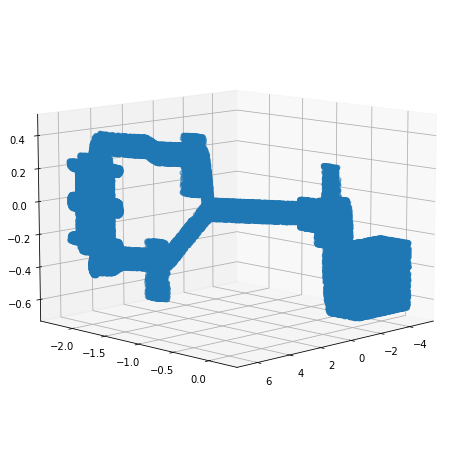

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.view_init(elev=10., azim=45)
ax1.scatter(geo[0], geo[1], geo[2], alpha=0.5)
plt.show()

In [15]:
#trying to look at what sections are the big peices I might want to graph as stls
l = list(geo[3])
countPoints = [[x,l.count(x)] for x in set(l)]

countPoints_many = []

for x, n in countPoints:
#     print(x, n)    
    if n > 1000:
        countPoints_many.append([x, n])

countPoints_many

[[174.0, 1077],
 [176.0, 3809],
 [183.0, 4695],
 [184.0, 1595],
 [185.0, 1115],
 [186.0, 1159],
 [187.0, 2387],
 [188.0, 2218],
 [199.0, 2020],
 [202.0, 1913],
 [203.0, 1845],
 [207.0, 1083],
 [211.0, 1086],
 [230.0, 1262]]

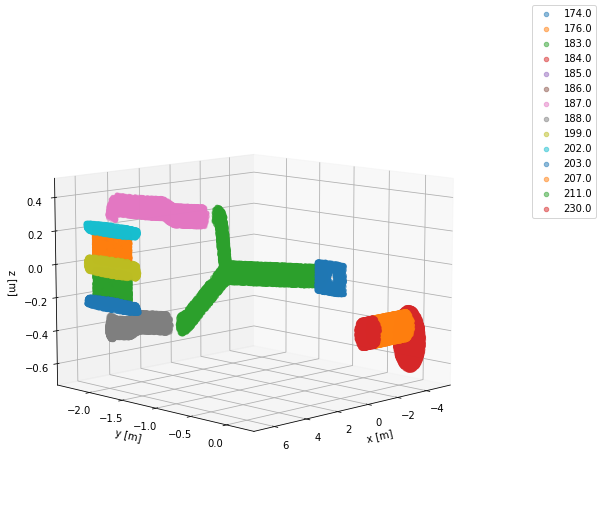

In [16]:
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1, projection='3d')

for n, i in countPoints_many:
    geo1 = geo[:, geo[3] == n]

    ax1.view_init(elev=10., azim=45)
    ax1.scatter(geo1[0], geo1[1], geo1[2], alpha=0.5, label=n)

ax1.set_xlabel("x [m]")
ax1.set_ylabel("y [m]")
ax1.set_zlabel("z [m]")
fig.legend()
plt.show()

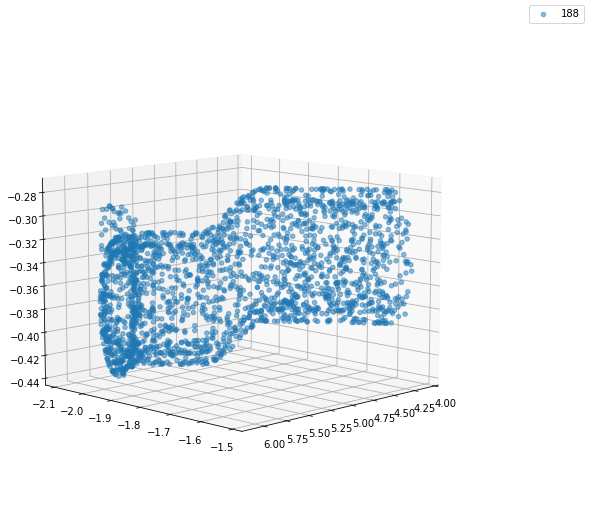

In [17]:
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1, projection='3d')

n = 188
geo1 = geo[:, geo[3] == n]

ax1.view_init(elev=10., azim=45)
ax1.scatter(geo1[0], geo1[1], geo1[2], alpha=0.5, label=n)

fig.legend()
plt.show()

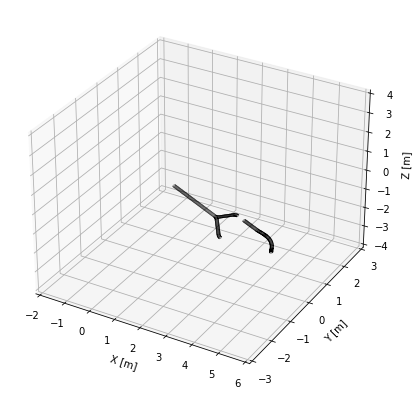

In [18]:
fig = plt.figure(figsize=(7,7))
axes = plt.axes(projection='3d')

axes.set_xlim3d(-2, 6)
axes.set_ylim3d(-3, 3)
axes.set_zlim3d(-4, 4)

ppf.graphSTL('STLsToGraph/nEDMsensitivity-nEDMguide^nEDMsensitivity-1.STL', axes)
ppf.graphSTL('STLsToGraph/nEDMsensitivity-CellGuide^nEDMsensitivity-1.STL', axes)

axes.set_xlabel("X [m]")
axes.set_ylabel("Y [m]")
axes.set_zlabel("Z [m]")
# axes.xaxis.labelpad=20
# axes.yaxis.labelpad=15
# axes.zaxis.labelpad=15

plt.show()

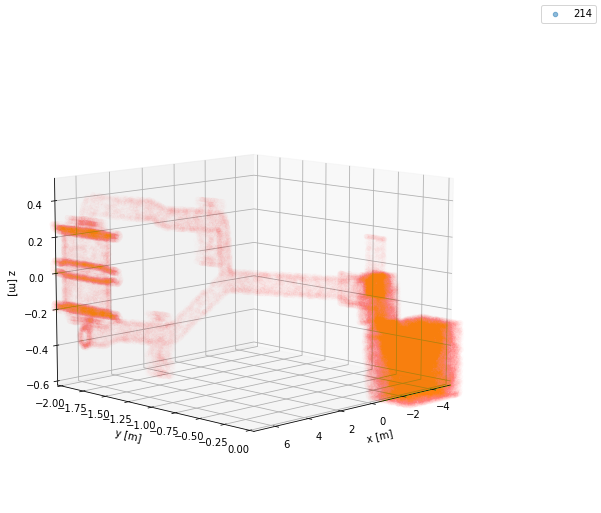

In [20]:
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.set_xlim3d(-5, 7)
ax1.set_ylim3d(-2, 0)
ax1.set_zlim3d(-0.6, 0.5)

ax1.set_xlabel("x [m]")
ax1.set_ylabel("y [m]")
ax1.set_zlabel("z [m]")

n = 214
geo1 = geo[:, geo[3] == n]

ax1.view_init(elev=10., azim=45)
ax1.scatter(geo1[0], geo1[1], geo1[2], alpha=0.5, label=n)

ax1.scatter(geo[0], geo[1], geo[2], alpha=0.005)

fig.legend()
plt.show()